### An autoregressive integrated moving average (ARIMA) model used to fit the confirmed cases of COVID-19 time series dataset and to predict the future cases.
22/03/2020 

In an outbreak of an infectious disease it is important to not only study the number of deaths, but also the growth rate of the number of people that get infected by the pathogen, in order to have a clear image of the state of the pandemic. Due to global deficiency in clinical tests that verify whether an individual is infected or not from the corona virus, it is essential to develop tools that can accurately assess the state of the pandemic.

In this notebook the ARIMA model can be fitted on time series datasets of the number of confirmed COVID-19
cases from different countries (such as China, South Korea, Japan, Italy, Spain, France, UK, Germany, Netherlands, USA, and Greece) in order to construct the curve that best characterizes the growth of the epidemic in each country and to predict the near future number of confirmed COVID-19 cases using the already available data. Time series data from different countries (China, South Korea, Japan, Italy, Spain, France, UK, Germany, Netherlands, USA, and Greece) were retrieved from the kaggle website ("Novel Corona Virus 2019 Dataset", 2020 https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset).

Here I present the example of Japan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
country_choise = 'Japan'
#In the available dataset the last day with available data is 23/03/2020
#I use the counted covid cases untill March 20, 2020, in order to test the precission of my model's prediction in the days (21-23/032020)
last_day = 3    

In [3]:
data_input = pd.read_csv('time_series_covid_19_confirmed.csv',index_col='Country/Region')    

# Transpose the matrix and remove the columns Province/State, Lat, Long 
data_input = data_input.transpose().iloc[3:,:]  

# The dates are the index of each row, convert the dates to DatetimeIndex format
data_input.index = pd.to_datetime(data_input.index)
dataset = data_input.groupby(data_input.columns, axis=1).sum()

country = dataset[country_choise][:-last_day].to_frame()    ## not to include the data after 23/3, in a data frame

ARIMA has been a classical approach taking into account the autoregressive nature of the data in Epidemiological research. ARIMA models are a generalization of an autoregressive moving average (ARMA) model, that requires the time series to be stationary.
A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:

● p is the number of autoregressive terms,

● d is the number of nonseasonal differences needed for stationarity, and

● q is the number of lagged forecast errors in the prediction equation.

To determine the order of a non-seasonal ARIMA model, a useful criterion is the Akaikeinformation criterion (AIC) and the Bayesian Information Criterion. The objective is to minimize the AIC or BIC values for a good model.


The autocorrelation and the partial autocorrelation plots for the original time series dataset for a selected country as well as for the 1st differencing and the 2nd differencing of the dataset are plotted in order to select the order of differencing (d), of the AR term (p) and of of the MA term (q) in the ARIMA model.

/home/rania/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/home/rania/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/home/rania/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


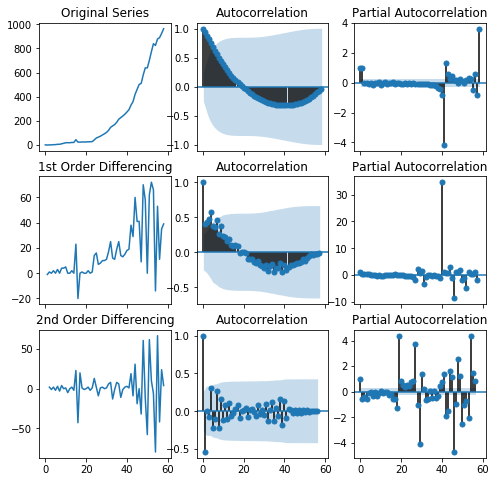

In [4]:
fig, axes = plt.subplots(3, 3, sharex=True,figsize=(8,8))

# Original Series
axes[0, 0].plot(country.values.squeeze()); axes[0, 0].set_title('Original Series')
plot_acf(country.values.squeeze(), lags=58, ax=axes[0, 1])
plot_pacf(country.values.squeeze(), lags=58, ax=axes[0, 2])

# 1st Order Differencing  
axes[1, 0].plot(country.diff().values.squeeze()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(country.diff().dropna(), lags=57, ax=axes[1, 1])
plot_pacf(country.diff().dropna(), lags=57, ax=axes[1, 2])

# 2nd Order Differencing  
axes[2, 0].plot(country.diff().diff().values.squeeze()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(country.diff().diff().dropna(), lags=56, ax=axes[2, 1])
plot_pacf(country.diff().diff().dropna(), lags=56, ax=axes[2, 2])

plt.show()

Selection of the order of differencing (d) in the ARIMA model: The d parameter of the ARIMA model is selected based on the stationarity of the series, inspecting the autocorrelation plots.

Selection of he order of the AR term (p) in the ARIMA model: The required number of AR terms is selected by inspecting the Partial Autocorrelation (PACF) plot for the number of lags that cross the significance limit in the PACF plot.

Selection of he order of the MA term (q) in the ARIMA model: The required number of MA terms is selected by inspecting the Autocorrelation (ACF) plot for the number of lags well above the significance limit in the ACF plot.

The BIC criterion was used for model selection.

For the above series, the time series reaches stationarity with two orders of differencing. So, the order of differencing is selected as 2, since the series is not perfectly stationary for the first order of differencing (weak stationarity). The simpler model that sufficiently explains the Y was selected, taking also into account the value of the BIC criterion (smaller values were preferable).

For the ARIMA (1,2,1) model the following table is reported:


/home/rania/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/rania/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Japan   No. Observations:                   57
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -240.014
Method:                       css-mle   S.D. of innovations             16.065
Date:                Tue, 15 Mar 2022   AIC                            488.028
Time:                        13:42:57   BIC                            496.201
Sample:                    01-24-2020   HQIC                           491.204
                         - 03-20-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7742      0.298      2.600      0.009       0.191       1.358
ar.L1.D2.Japan    -0.1406      0.166     -0.845      0.398      -0.467       0.185
ma.L1.D2.Japan    -0.8788      0.135

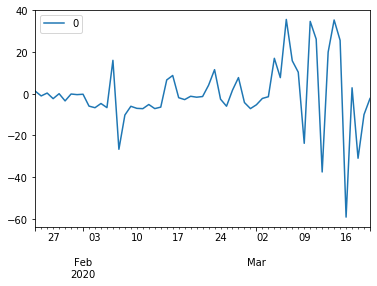

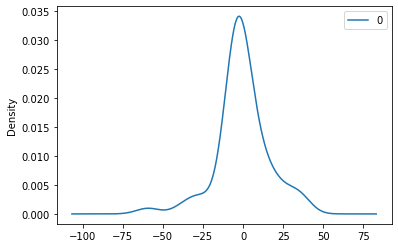

               0
count  57.000000
mean   -0.373947
std    16.209353
min   -59.230343
25%    -6.046950
50%    -1.691314
75%     6.593513
max    35.619773


In [5]:
model = ARIMA(country, order=(1,2,1))    ###change the model!!
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

First, a line plot of the residual errors was plotted, to check if there might still be some trend not
captured by the model. Next, a density plot of the residual error values was plotted to visualize if the errors are Gaussian and centered on zero.

In the following plot, the actual counts are plotted against the fitted values to get a first impression if the model represents well the data.

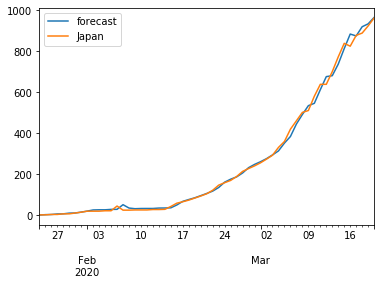

In [6]:
model_fit.plot_predict(dynamic=False)
plt.show()

The ARIMA model determined is used to forecast the counts of confirmed cases of COVID-19 in the future dates: 21-03-2020 to 26-03-2020 and the predicted data can be compared to the true counts of confirmed cases for each day and the root mean square error was calculated (the true counts of confirmed cases can be collected from the visual dashboard of the Johns Hopkins University).

/home/rania/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/rania/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


[1002.70175439 1043.10526316 1084.21052632 1126.01754386 1168.52631579
 1211.73684211]


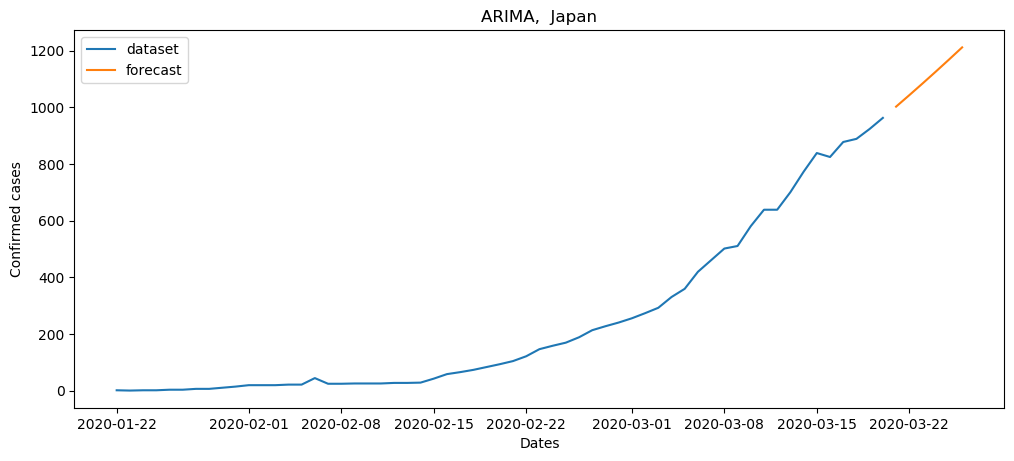

In [7]:
model = ARIMA(country, order=(0,2,0))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)  # 95% conf
dates_fc = pd.to_datetime(['2020-3-21', '2020-3-22', '2020-3-23', '2020-3-24', '2020-3-25', '2020-3-26'])
fc_df = pd.DataFrame(fc, dates_fc)
#print(fc_df)
print(fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(country, label='dataset')
plt.plot(fc_df, label='forecast')

plt.xlabel('Dates')
plt.ylabel('Confirmed cases')
plt.title('ARIMA,  ' + country_choise)
plt.legend(loc='upper left', fontsize=10)
plt.show()